<a href="https://colab.research.google.com/github/pj2111/Assignments/blob/master/assignment_data/warmup_pytorch_modeldesign_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers torch datasets > /dev/null

# 1) Design the model (input, output size and forward pass)
    # Input, target data must have shape of m x n, i.e both must have features
    # Model needs to designed by keeping the feature length in mind, as these will be processed
# 2) construct loss and optimizer
    # torch.nn module contains the variety of Loss Criterions
    # torch.optim module contains various optimizers
# 3) training loop

###  - forward pass: compute prediction
    # loss criterion is called with the target and predicted values

###  - backward pass: compute gradient & update weights
    # optimizers will take care of gradient, weight updates of the model
    # remember to pass optimizer.zero_grad() for the gradient to be
    # reset

### Start by working on bare-bones matrix model LinReg Training

In [1]:
import torch

In [17]:
X = torch.tensor([1, 2, 3, 4, 5, 6], dtype=torch.float32)
y = torch.tensor([5, 8, 11, 14, 17, 20], dtype=torch.float32)

In [16]:
y

tensor([ 5.,  8., 11., 14., 17., 20.])

In [18]:
# here is the weights of the model, simple one-c tensor with gradient calc ability

w = torch.tensor(0.0, requires_grad=True, dtype=torch.float32)

In [6]:
y

tensor([ 5.,  8., 11., 14., 17., 20.])

In [7]:
def forward(x):
  return x * w

In [8]:
def loss(y, y_pred):
  return ((y_pred - y) ** 2).mean()

In [9]:
import numpy as np
# Gradient calculation is done using Numpy
def gradient(x, y, y_pred):
  return np.dot(2 * x, y_pred - y).mean()

In [10]:
# Try predict what is the output before model training

print(f"Predict with simple forward fn: {forward(5)}")

Predict with simple forward fn: 0.0


In [11]:
# beginning the training process

learning_rate = 0.01
n_iters = 30

In [12]:
# gradients calculated using numpy method
w = 0.0

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(y , y_pred)
  dw = gradient(X, y, y_pred)
  w -= learning_rate * dw
  if epoch % 1 == 0:
    print(f"epoch {epoch + 1}: w= {w: 3f} loss: {l: 8f} dw : {dw: 3f}")

epoch 1: w=  6.300000 loss:  182.500000 dw : -630.000000
epoch 2: w=  1.134000 loss:  122.965034 dw :  516.600037
epoch 3: w=  5.370121 loss:  82.933693 dw : -423.612091
epoch 4: w=  1.896501 loss:  56.016628 dw :  347.361908
epoch 5: w=  4.744869 loss:  37.917572 dw : -284.836761
epoch 6: w=  2.409207 loss:  25.747789 dw :  233.566193
epoch 7: w=  4.324450 loss:  17.564817 dw : -191.524307
epoch 8: w=  2.753951 loss:  12.062580 dw :  157.049911
epoch 9: w=  4.041760 loss:  8.362876 dw : -128.780899
epoch 10: w=  2.985757 loss:  5.875196 dw :  105.600327
epoch 11: w=  3.851679 loss:  4.202481 dw : -86.592247
epoch 12: w=  3.141623 loss:  3.077748 dw :  71.005646
epoch 13: w=  3.723869 loss:  2.321479 dw : -58.224648
epoch 14: w=  3.246427 loss:  1.812963 dw :  47.744217
epoch 15: w=  3.637930 loss:  1.471037 dw : -39.150284
epoch 16: w=  3.316898 loss:  1.241126 dw :  32.103245
epoch 17: w=  3.580144 loss:  1.086532 dw : -26.324627
epoch 18: w=  3.364282 loss:  0.982584 dw :  21.586185

In [13]:
print(f"Prediction after training f(5) = {forward(5)}")

Prediction after training f(5) = 17.26274795532227


In [14]:
# [5, 8, 11, 14, 17, 20]
# for i in X:
    # print(forward(i))
    
X*w

tensor([ 3.4525,  6.9051, 10.3576, 13.8102, 17.2627, 20.7153])

In [19]:
# gradients calculated using tensor backward() method

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(y , y_pred)
  l.backward()  # this part is done by pytorch
  with torch.no_grad():
    w -= learning_rate * w.grad
  w.grad.zero_()
  if epoch % 1 == 0:
    print(f"epoch {epoch + 1}: w= {w: 3f} loss: {l: 8f}")

epoch 1: w=  1.050000 loss:  182.500000
epoch 2: w=  1.781500 loss:  88.971252
epoch 3: w=  2.291111 loss:  43.577595
epoch 4: w=  2.646141 loss:  21.546038
epoch 5: w=  2.893478 loss:  10.853137
epoch 6: w=  3.065790 loss:  5.663396
epoch 7: w=  3.185834 loss:  3.144587
epoch 8: w=  3.269464 loss:  1.922097
epoch 9: w=  3.327727 loss:  1.328767
epoch 10: w=  3.368316 loss:  1.040798
epoch 11: w=  3.396594 loss:  0.901035
epoch 12: w=  3.416294 loss:  0.833201
epoch 13: w=  3.430018 loss:  0.800278
epoch 14: w=  3.439579 loss:  0.784300
epoch 15: w=  3.446240 loss:  0.776544
epoch 16: w=  3.450881 loss:  0.772780
epoch 17: w=  3.454114 loss:  0.770953
epoch 18: w=  3.456366 loss:  0.770067
epoch 19: w=  3.457935 loss:  0.769637
epoch 20: w=  3.459028 loss:  0.769428
epoch 21: w=  3.459790 loss:  0.769326
epoch 22: w=  3.460320 loss:  0.769277
epoch 23: w=  3.460690 loss:  0.769253
epoch 24: w=  3.460947 loss:  0.769242
epoch 25: w=  3.461126 loss:  0.769236
epoch 26: w=  3.461251 loss:

#### Going full torch mode

In [20]:
import torch
import torch.nn as nn

In [21]:
# the shape of the input is different, when used with torch models
X = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10]], dtype=torch.float32)

# n_features is the cols persent in each datapoint, both inputs & targets
n_samples, n_features = X.shape
x_test = torch.tensor([5],
                      dtype=torch.float32)

In [22]:
# Models are basic python classes with the blueprint.

class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(n_features, n_features)

In [23]:
loss = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(),
                        lr=0.01)

print(f"prediction before training: f(5)= {model(x_test).item():.3f}")
# training
learning_rate = 0.01
n_iters = 30

prediction before training: f(5)= 4.796


In [27]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[1.8262]], requires_grad=True)
Parameter containing:
tensor([0.6263], requires_grad=True)


In [24]:
# Looking at the LinReg Model Training

for epoch in range(n_iters):
    # prediction to be extracted
    y_pred = model(X)
    # compute loss
    l = loss(Y, y_pred)
    # get gradient ==> backward()
    l.backward()  # will calculate the grad w.r.t 'w'
    # update weights is done by the optimizert
    # with torch.no_grad():
    #    w -= learning_rate * w.grad
    optim.step()
    # make the accumulated grad to 0
    optim.zero_grad()
    # printing epoch
    if epoch % 1 == 0:
        [w, b] = model.parameters()
        # observe how the weights are extracted to display
        print(f"epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss: {l:.8f}")

epoch 1: w = 1.094, loss: 11.23808289
epoch 2: w = 1.264, loss: 6.58492279
epoch 3: w = 1.394, loss: 3.87304926
epoch 4: w = 1.493, loss: 2.29246354
epoch 5: w = 1.569, loss: 1.37113631
epoch 6: w = 1.627, loss: 0.83399516
epoch 7: w = 1.671, loss: 0.52073926
epoch 8: w = 1.705, loss: 0.33795559
epoch 9: w = 1.731, loss: 0.23120518
epoch 10: w = 1.751, loss: 0.16876490
epoch 11: w = 1.767, loss: 0.13214798
epoch 12: w = 1.779, loss: 0.11058128
epoch 13: w = 1.788, loss: 0.09778684
epoch 14: w = 1.795, loss: 0.09010570
epoch 15: w = 1.801, loss: 0.08540602
epoch 16: w = 1.806, loss: 0.08244508
epoch 17: w = 1.809, loss: 0.08049901
epoch 18: w = 1.812, loss: 0.07914598
epoch 19: w = 1.814, loss: 0.07813971
epoch 20: w = 1.816, loss: 0.07733725
epoch 21: w = 1.818, loss: 0.07665491
epoch 22: w = 1.819, loss: 0.07604417
epoch 23: w = 1.820, loss: 0.07547637
epoch 24: w = 1.821, loss: 0.07493521
epoch 25: w = 1.822, loss: 0.07441089
epoch 26: w = 1.823, loss: 0.07389782
epoch 27: w = 1.824,

In [25]:
print(f"prediction after training: f(5)= {model(x_test).item():.3f}")

prediction after training: f(5)= 9.757


### Fine Tuning model from Scratch with Mnist Data

This part of the notebook is self-contained, and can be extracted into a script for execution

- MNIST data loader

- Dataload and transformation

- Design Multi-layer neural net with activation function

- Loss and Optimiser declaration

- Training loop with batches

- model evaluation using accuracy

- enable GPU support

In [24]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.nn import functional as F

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
# preliminary data
input_size = 784
hidden_size = 100

num_classes = 10
num_epochs = 2

batch_size = 100
learning_rate = 0.001

In [30]:
raw_train = torchvision.datasets.MNIST(root='./data', train=True, download=False)
raw_train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [37]:

raw_train[10][0]

In [ ]:
from IPython.display import Image
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(raw_train[0][0]).show()

In [38]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
                         shuffle=False)

In [39]:
# usage of iterator / generator
examples = iter(train_loader)

samples, labels = next(examples)

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


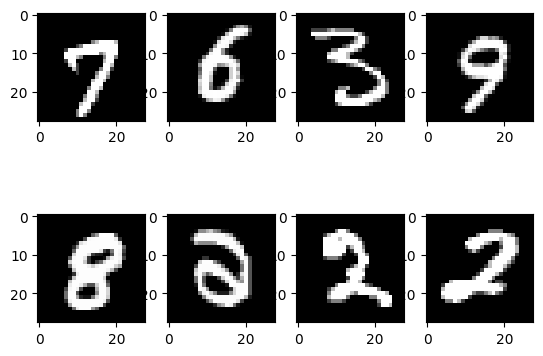

In [40]:
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [41]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [42]:
model = NeuralNet(input_size=input_size,
                  hidden_size=hidden_size,
                  num_classes=num_classes)

In [43]:
criterion = nn.CrossEntropyLoss()

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

running_loss = 0.0

running_corrects = 0

In [ ]:
for epoch in range(num_epochs):
    print(f"entering epoch: {epoch + 1}\n")
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

    # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

    # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        running_corrects += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print(f"epoch: {epoch+1} / {num_epochs}, step {i + 1} / {n_total_steps} loss= {loss.item():.3f}")
            running_loss = 0.0
            running_corrects = 0

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples =0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)
        # value, index
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    acc = 100 * n_correct / n_samples
    print(f"accuracy = {acc}")